
Training Linear Regression...
Linear Regression Results:
  Training MSE: 0.0496
  Test MSE: 0.0524
  Training R²: 0.2404
  Test R²: 0.1053

Training Random Forest...
Random Forest Results:
  Training MSE: 0.0167
  Test MSE: 0.0433
  Training R²: 0.7449
  Test R²: 0.2598

Training Gradient Boosting...
Gradient Boosting Results:
  Training MSE: 0.0351
  Test MSE: 0.0435
  Training R²: 0.4628
  Test R²: 0.2568


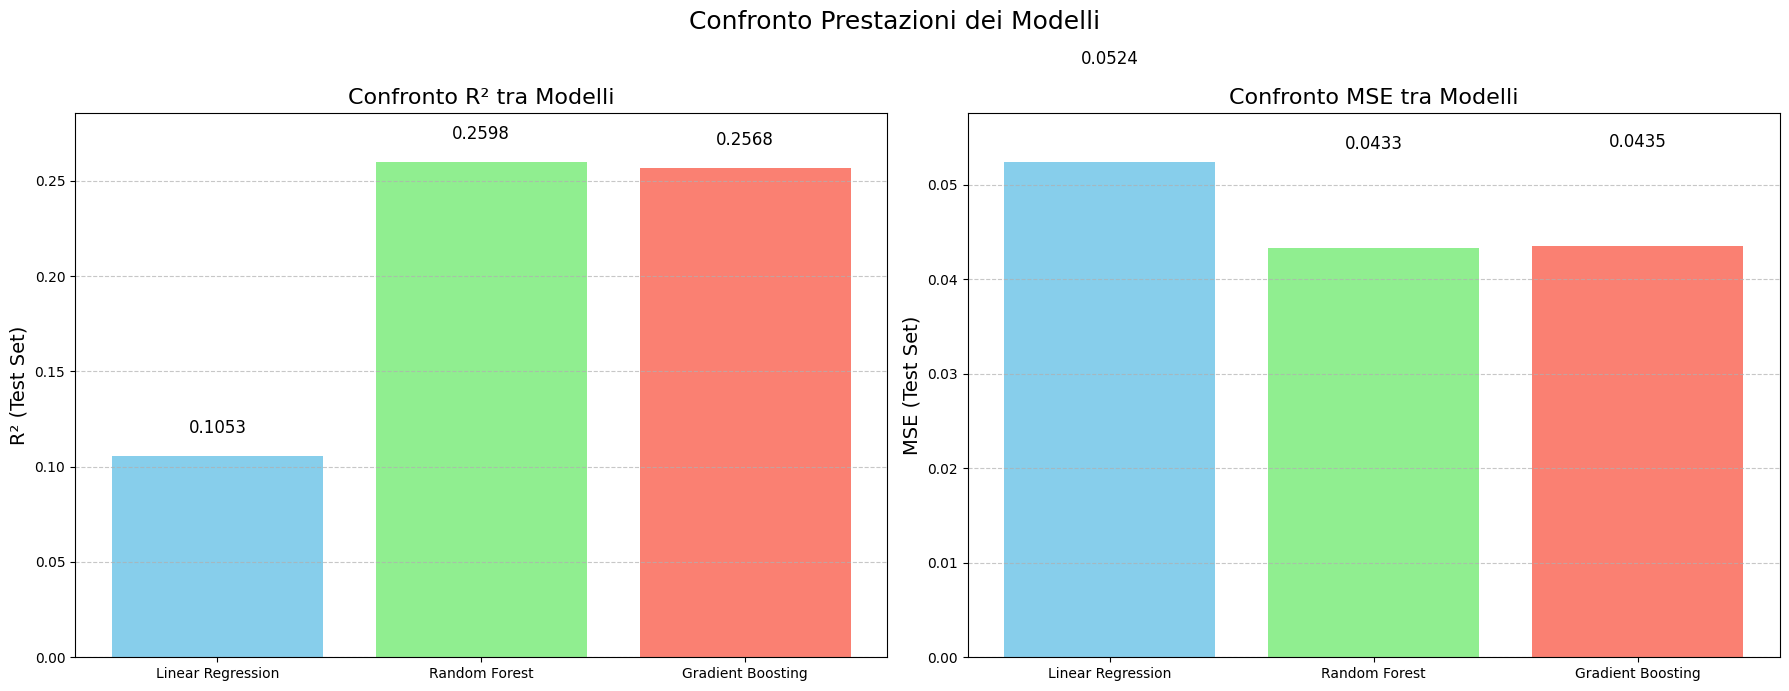

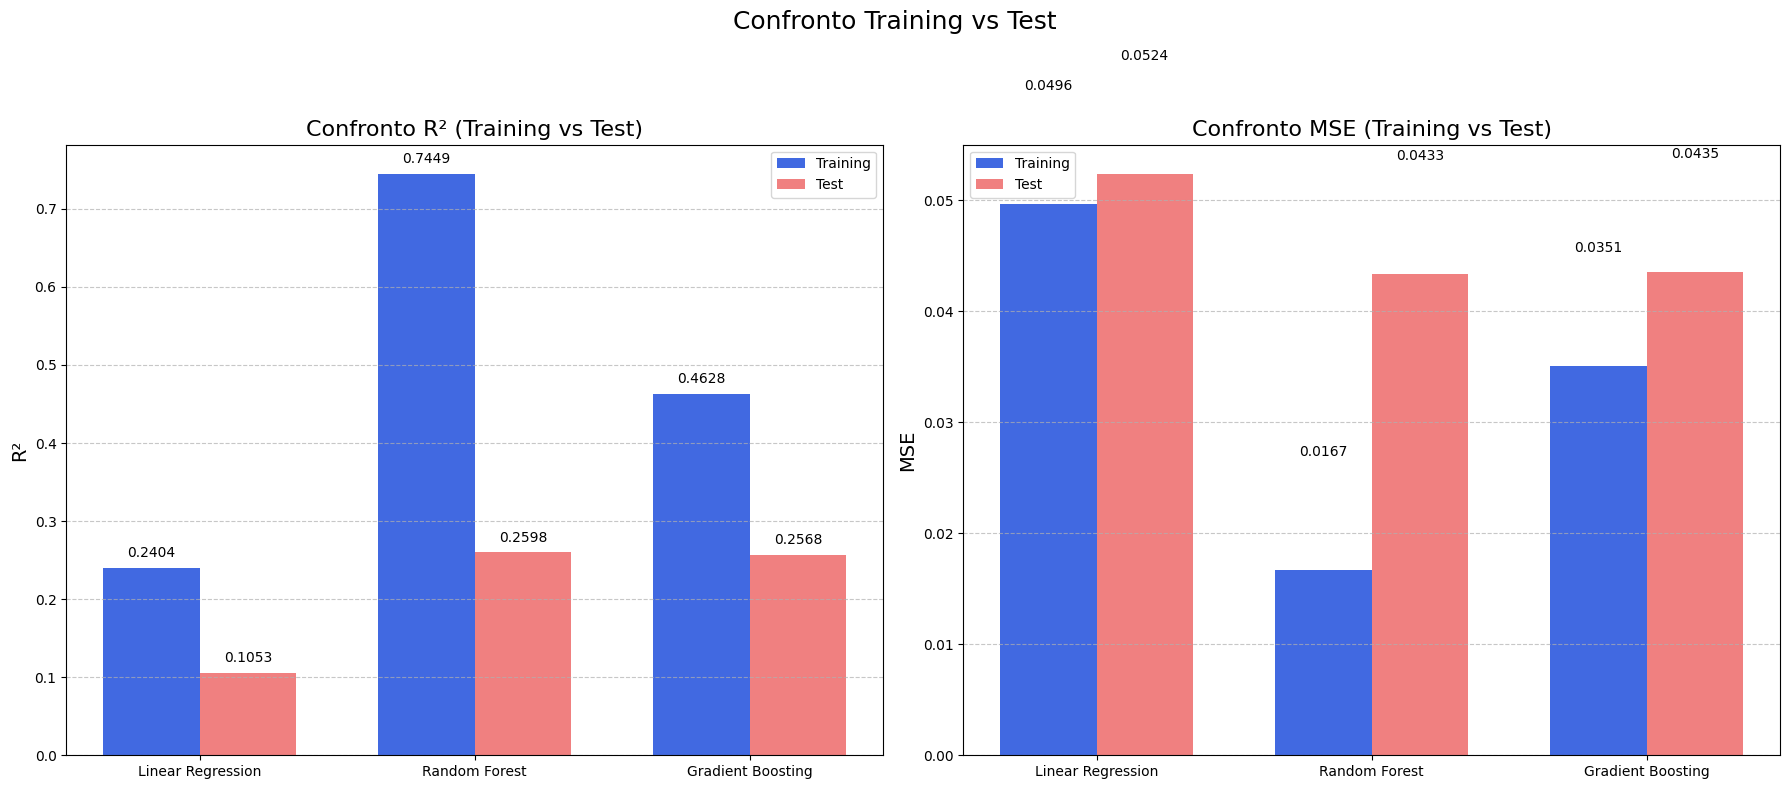


 Modello migliore: Random Forest, Test R² = 0.2598

Valutazione finale:
  MSE: 0.0425
  R²: 0.2747
  RMSE: 0.2060


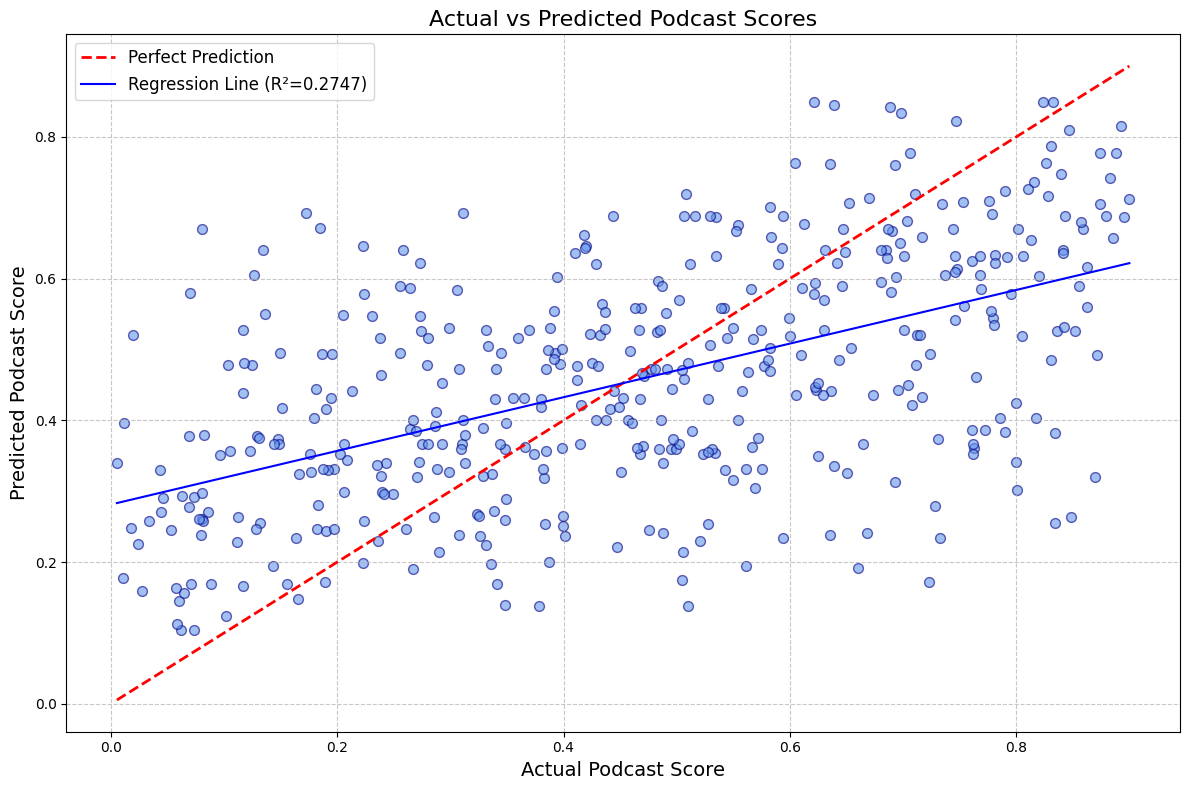

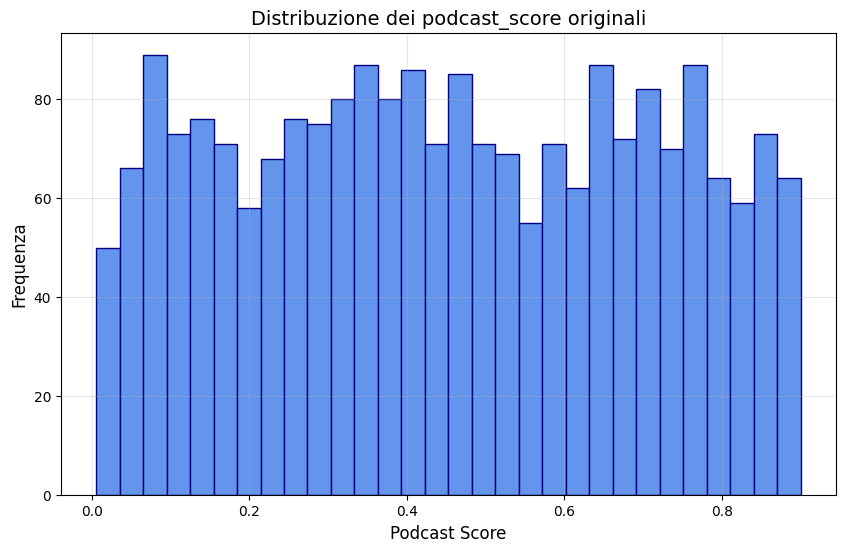

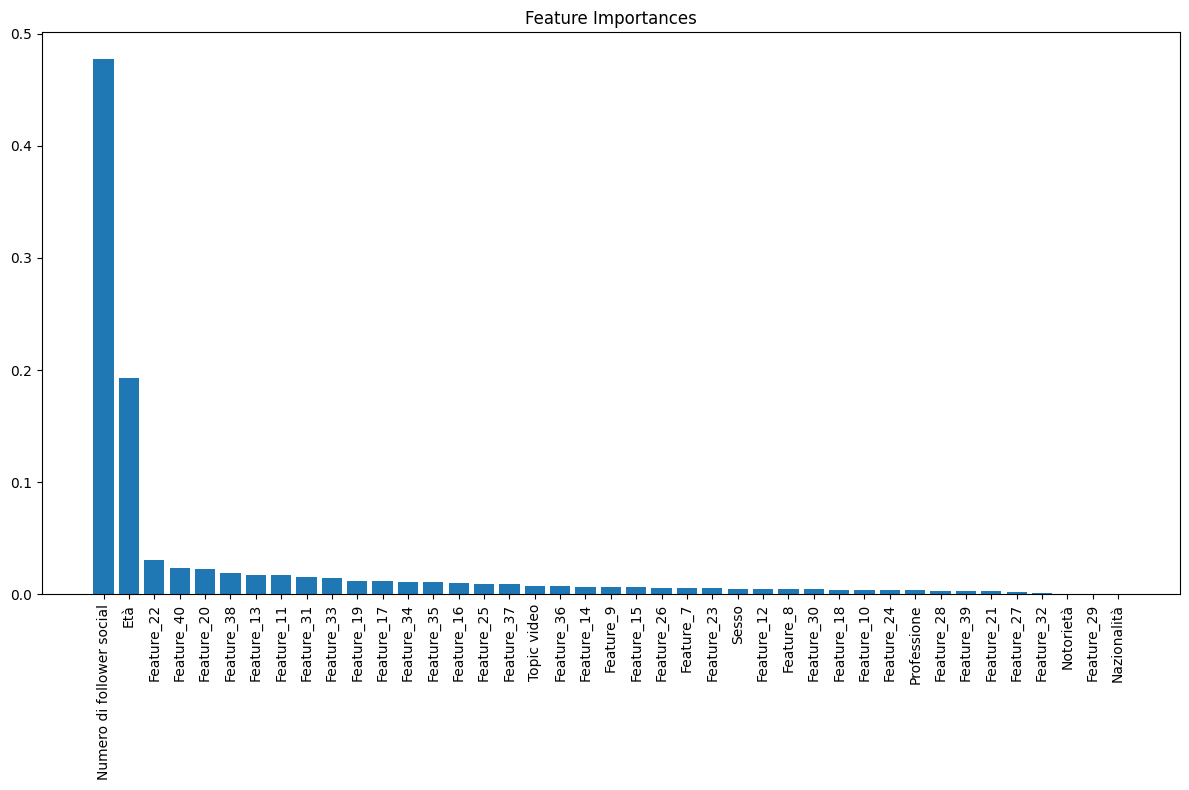

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
from scipy import stats

df = pd.read_csv('../data/guest_data_with_podcast_score.csv')

X = df.drop(['Nome','podcast_score', 'video_id', 'published_at'], axis=1)
y = df['podcast_score']

categorical_cols = ['Nazionalità', 'Sesso', 'Professione', 'Notorietà', 'Topic video']
numerical_cols = ['Età', 'Numero di follower social']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_cols),
        ('categorical', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    "Random Forest": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    "Gradient Boosting": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ])
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }
    
    print(f"{name} Results:")
    print(f"  Training MSE: {train_mse:.4f}")
    print(f"  Test MSE: {test_mse:.4f}")
    print(f"  Training R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    

model_names = list(results.keys())
test_r2_values = [results[name]['test_r2'] for name in model_names]
test_mse_values = [results[name]['test_mse'] for name in model_names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Grafico per R²
bars1 = ax1.bar(model_names, test_r2_values, color=['skyblue', 'lightgreen', 'salmon'])
ax1.set_title('Confronto R² tra Modelli', fontsize=16)
ax1.set_ylabel('R² (Test Set)', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0, max(test_r2_values) * 1.1)  

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=12)

# Grafico per MSE
bars2 = ax2.bar(model_names, test_mse_values, color=['skyblue', 'lightgreen', 'salmon'])
ax2.set_title('Confronto MSE tra Modelli', fontsize=16)
ax2.set_ylabel('MSE (Test Set)', fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, max(test_mse_values) * 1.1) 

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=12)

plt.suptitle('Confronto Prestazioni dei Modelli', fontsize=18, y=0.98)
plt.tight_layout()
plt.show()

# Grafico per confrontare training e test
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

bar_width = 0.35
index = np.arange(len(model_names))

# Grafico per R²
train_r2_values = [results[name]['train_r2'] for name in model_names]
bars1 = ax1.bar(index, train_r2_values, bar_width, label='Training', color='royalblue')
bars2 = ax1.bar(index + bar_width, test_r2_values, bar_width, label='Test', color='lightcoral')

ax1.set_title('Confronto R² (Training vs Test)', fontsize=16)
ax1.set_ylabel('R²', fontsize=14)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(model_names)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Grafico per MSE
train_mse_values = [results[name]['train_mse'] for name in model_names]
bars3 = ax2.bar(index, train_mse_values, bar_width, label='Training', color='royalblue')
bars4 = ax2.bar(index + bar_width, test_mse_values, bar_width, label='Test', color='lightcoral')

ax2.set_title('Confronto MSE (Training vs Test)', fontsize=16)
ax2.set_ylabel('MSE', fontsize=14)
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(model_names)
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Confronto Training vs Test', fontsize=18, y=0.98)
plt.tight_layout()
plt.show()

best_model_name = max(results, key=lambda k: results[k]['test_r2'])
print(f"\n Modello migliore: {best_model_name}, Test R² = {results[best_model_name]['test_r2']:.4f}")

# Ottimizzazione del modello
if best_model_name == "Random Forest":
    
    param_grid = {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    }
    
    grid_search = GridSearchCV(
        models[best_model_name],
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
elif best_model_name == "Gradient Boosting":    
    param_grid = {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    }
    
    grid_search = GridSearchCV(
        models[best_model_name],
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
else:
    best_model = models[best_model_name]

# Valutazione finale
y_pred = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print("\nValutazione finale:")
print(f"  MSE: {final_mse:.4f}")
print(f"  R²: {final_r2:.4f}")
print(f"  RMSE: {np.sqrt(final_mse):.4f}")

# Grafico actual vs predicted
plt.figure(figsize=(12, 8)) 
plt.scatter(y_test, y_pred, alpha=0.6, s=50, color='cornflowerblue', edgecolor='navy')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Prediction')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Actual Podcast Score', fontsize=14)
plt.ylabel('Predicted Podcast Score', fontsize=14)
plt.title('Actual vs Predicted Podcast Scores', fontsize=16)

# Linea di regressione del trend reale
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
plt.plot(np.sort(y_test), intercept + slope*np.sort(y_test), 'b-', 
         linewidth=1.5, label=f'Regression Line (R²={final_r2:.4f})')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Grafico distribuzione score
plt.figure(figsize=(10, 6))
plt.hist(df['podcast_score'], bins=30, color='cornflowerblue', edgecolor='navy')
plt.title('Distribuzione dei podcast_score originali', fontsize=14)
plt.xlabel('Podcast Score', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


if hasattr(best_model[-1], 'feature_importances_'):
    feature_names = []
    
    for name, transformer, cols in best_model[0].transformers_:
        if name == 'cat':
            feature_names.extend([f"{col}_{val}" for col in cols 
                                 for val in transformer.named_steps['onehot'].categories_[cols.index(col)]])
        else:
            feature_names.extend(cols)
    
    importances = best_model[-1].feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    # Grafico della feature importance
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] if i < len(feature_names) else f"Feature_{i}" for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()




In [2]:
# Function to predict podcast score for a new guest
def predict_podcast_score(guest_data):
    """
    Predict podcast score for a new guest
    
    Parameters:
    -----------
    guest_data : dict
        Dictionary with guest information
        
    Returns:
    --------
    float
        Predicted podcast score
    """
    # Convert to DataFrame
    guest_df = pd.DataFrame([guest_data])
    
    # Make prediction
    prediction = best_model.predict(guest_df)
    
    return prediction[0]

# Example usage
print("\nExample prediction for a new guest:")
example_guest = {
    'Nazionalità': 'America', 
    'Sesso': 'M',
    'Età': 35,
    'Professione': 'ARTE, INTRATTENIMENTO E MEDIA',
    'Notorietà': 'Personaggio Pubblico',
    'Numero di follower social': 100000,
    'Topic video': 'POLITICA, DIRITTO E SOCIETÀ'
}

try:
    predicted_score = predict_podcast_score(example_guest)
    print(f"Predicted podcast score: {predicted_score:.4f}")
except Exception as e:
    print(f"Error making prediction: {e}")
    print("Note: The predict function might need adjustment based on the exact features used in training.")


Example prediction for a new guest:
Predicted podcast score: 0.4110
